# Training, Underfitting & Overfitting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import torch
from sklearn.model_selection import train_test_split


## Training von Netzwerken, Under-/Overfitting

Wir haben bereits besprochen, dass ein Machine Learning Modell generalisiert.
In diesem Notebook möchten wir einen Effekt betrachten, welcher auftreten kann, wenn ein Modell die Daten zu schlecht oder zu gut lernt.

Wenn ein Modell die Daten kaum lernt also nicht gut auf die Trainingsdaten fitted spricht man von **Underfitting**.

Wenn ein Modell die Trainingsdaten jedoch perfekt abbildet und auf Testdaten deutlich schlechter funktioniert spricht man von **Overfitting**.


Führen Sie die Zelle unten aus und beantworten danach die Fragen unter der Zelle.

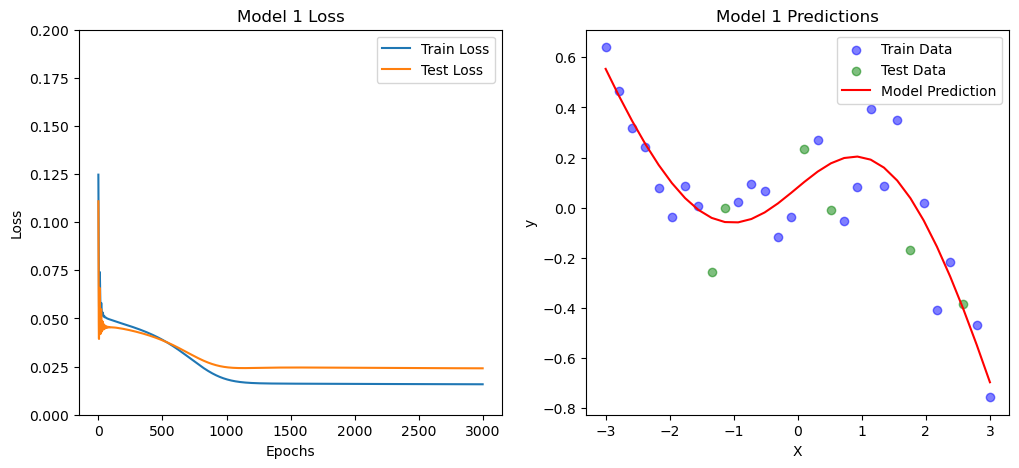

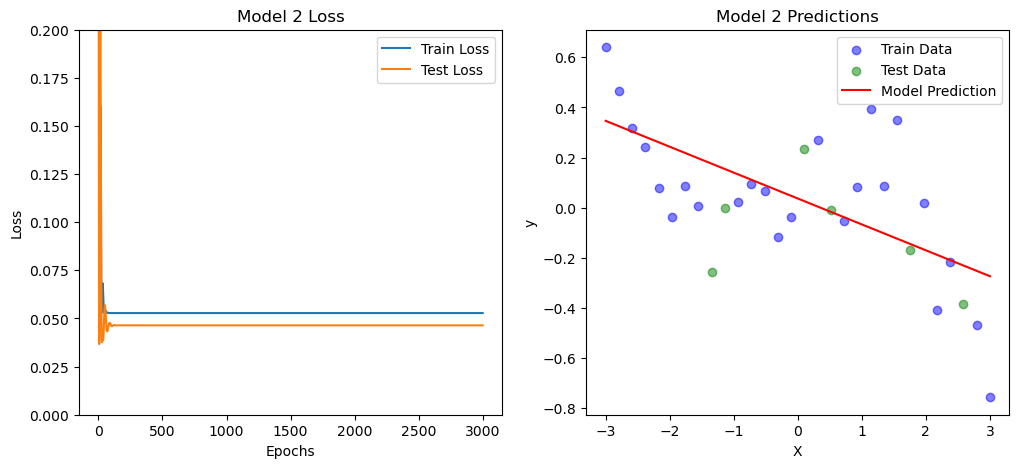

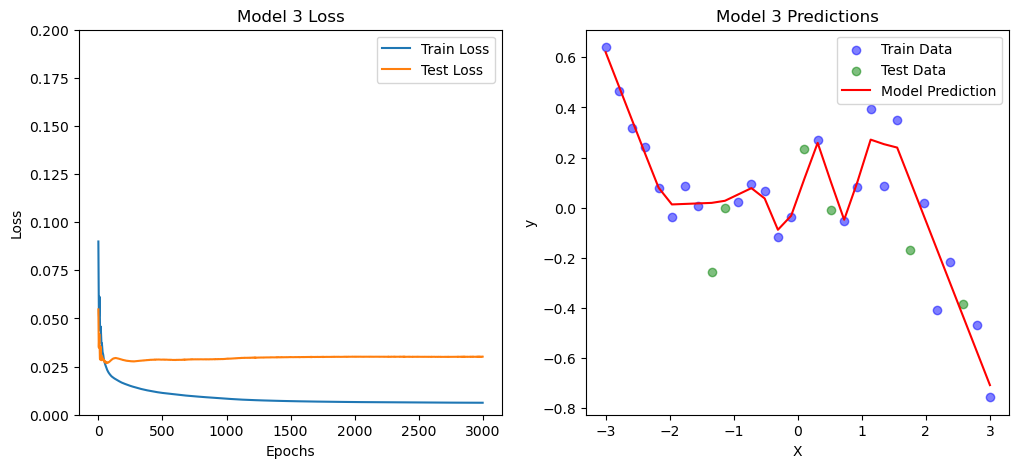

In [2]:
X = np.linspace(-3, 3, 30)
y = np.array([6.40320211e-01, 4.65454802e-01, 3.18542423e-01, 2.41632279e-01,
  7.90939261e-02, -3.68292645e-02,  8.43445053e-02,  7.45484173e-03,
 -2.57748336e-01, -3.88458508e-05,  2.23775450e-02,  9.56693324e-02,
  6.59981685e-02, -1.18768602e-01, -3.90238869e-02,  2.32054080e-01,
  2.70815440e-01, -8.54839118e-03, -5.38726619e-02,  8.32862909e-02,
  3.93309346e-01,  8.69511514e-02,  3.50274734e-01, -1.69659711e-01,
  1.97757116e-02, -4.07498944e-01, -2.18885263e-01, -3.86262075e-01,
 -4.67668757e-01, -7.57073736e-01])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Drei verschiedene Modelle
model1 = nn.Sequential(
    nn.Linear(1, 12),
    nn.LogSigmoid(),
    nn.Linear(12, 1)
)

model2 = nn.Sequential(
    nn.Linear(1, 3),
    nn.Identity(),
    nn.Linear(3, 1)
)
model3 = nn.Sequential(
    nn.Linear(1, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 1)
)
models = [model1, model2, model3]

# Training Funktion
def train_model(model, X_train, y_train, X_test, y_test, num_epochs=3000, learning_rate=0.01):
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())
    return train_losses, test_losses

# Model Training und Visualisierung
for i, model in enumerate(models):
    train_losses, test_losses = train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(train_losses)), train_losses, label='Train Loss')
    plt.plot(range(len(test_losses)), test_losses, label='Test Loss')
    plt.title(f'Model {i+1} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 0.2)
    plt.legend()
    plt.subplot(1, 2, 2)
    model.eval()
    with torch.no_grad():
        predictions = model(torch.FloatTensor(X))
    plt.scatter(X_train, y_train, label='Train Data', color='blue', alpha=0.5)
    plt.scatter(X_test, y_test, label='Test Data', color='green', alpha=0.5)
    plt.plot(X, predictions.numpy(), color='red', label='Model Prediction')
    plt.title(f'Model {i+1} Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()


## Aufgabe 1

**Frage A:** Betrachten Sie das Modell 2. Was beobachten Sie bezüglich des absoluten Loss für Training und Testing?

**Frage B:** Betrachten Sie das Modell 3. Was fällt Ihnen bezüglich des Train und Test Loss auf? 

**Frage C:** Welches Modell findet die beste Balance zwischen Flexibilität und Generalisierung?

**Frage D:** Welches Modell ist von Overfitting bzw. Underfitting betroffen?

**Frage E:** Ist es sinnvoll immer einen möglichst kleinen Training-Loss anzustreben?
